# Evaluation of pickled pipelines
This notebook is used to evaluate every .pkl model that has been generated.

Some observations
* Results suggest that the parameters of the random forests and XGboost are not being trained properly
* Naive bayes methods are perfoming very well. Maybe it is about time to understand them in a better we
* Two families of pipelines are still missing: SVM and NN.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pipeline_utilities import ColumnSelector
from pipeline_utilities import ModelTransformer
from pipeline_utilities import study_performance_of_all_available_pickled_models
from sklearn.model_selection import train_test_split

In [2]:
train_csv = pd.read_csv('train.csv').set_index('ID_code')
#test_csv = pd.read_csv('test.csv').set_index('ID_code')
Features = train_csv.drop(columns = 'target')
target = train_csv.target
X, X_dropout, y, y_dropout = train_test_split(Features, target, test_size=0.25, random_state=42)

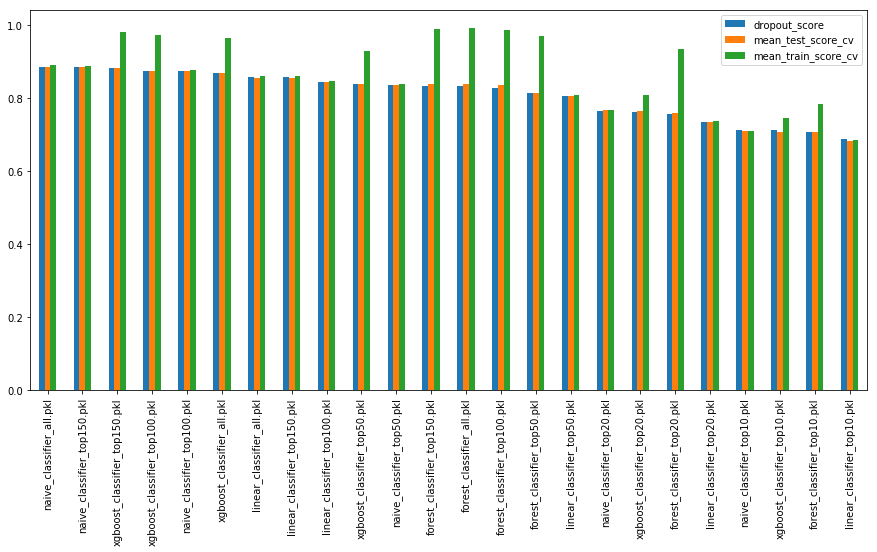

In [3]:
dr = study_performance_of_all_available_pickled_models(X_dropout, y_dropout)
dr.sort_values(by='dropout_score', ascending=False).plot.bar(figsize=(15, 7));